# Test h-nne v2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from hnne import HNNE
from hnne_benchmarking.data import (
    load_coil20, 
    load_shuttle, 
    load_mnist,
    load_fmnist,
    load_imagenet_test,
    load_cifar_10,
    load_bbt,
    load_buffy,
    load_imagenet_train,
    load_google_news,
    load_higgs
)

In [3]:
DATA_PATH = Path("/home/marios/datasets/hnne_datasets")
PROJ_PATH = DATA_PATH / "projections"
cmap = "tab20"

## Figure out the issue of h-nne on bbt

In [78]:
dataset_name = "BBT"
data, labels = load_bbt(DATA_PATH)
print(data.shape, labels.shape, pd.DataFrame(labels).groupby(0).size())

(199346, 2048) (199346,) 0
1.0    16272
2.0    64661
3.0    68286
4.0    18184
5.0    31943
dtype: int64


In [79]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 17min 29s, sys: 1min 33s, total: 19min 3s
Wall time: 56.3 s


In [80]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 6min 20s, sys: 1min 18s, total: 7min 38s
Wall time: 29.9 s


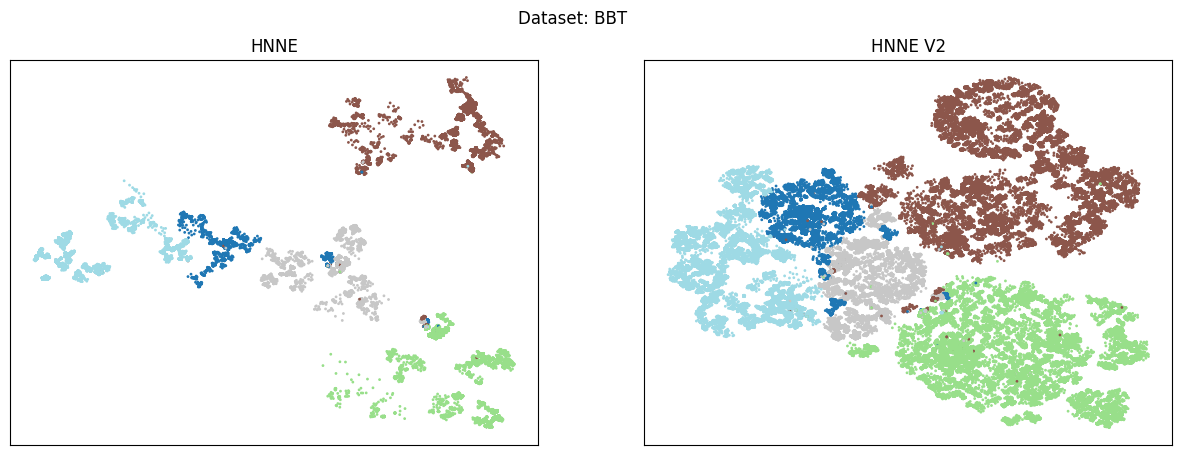

In [27]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=labels, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=labels, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

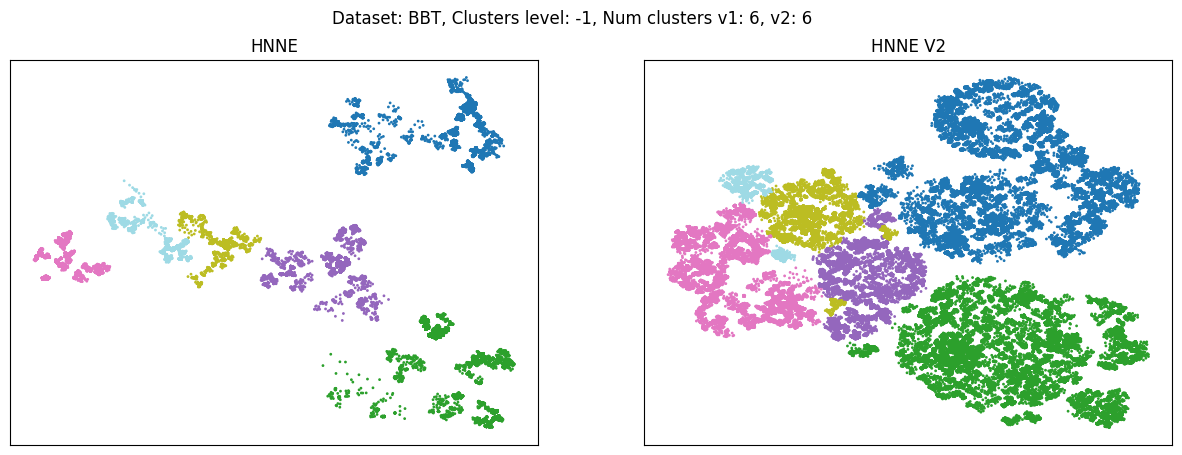

In [30]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=clusters_v1, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=clusters_v2, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

## Create h-nne visualizations for all datasets

### COIL-20

In [81]:
dataset_name = "COIL-20"
data, labels = load_coil20(DATA_PATH)
print(data.shape, labels.shape)

(1440, 16384) (1440,)


In [82]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 6.97 s, sys: 6.08 s, total: 13 s
Wall time: 715 ms


In [83]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 9.93 s, sys: 5.84 s, total: 15.8 s
Wall time: 3.61 s


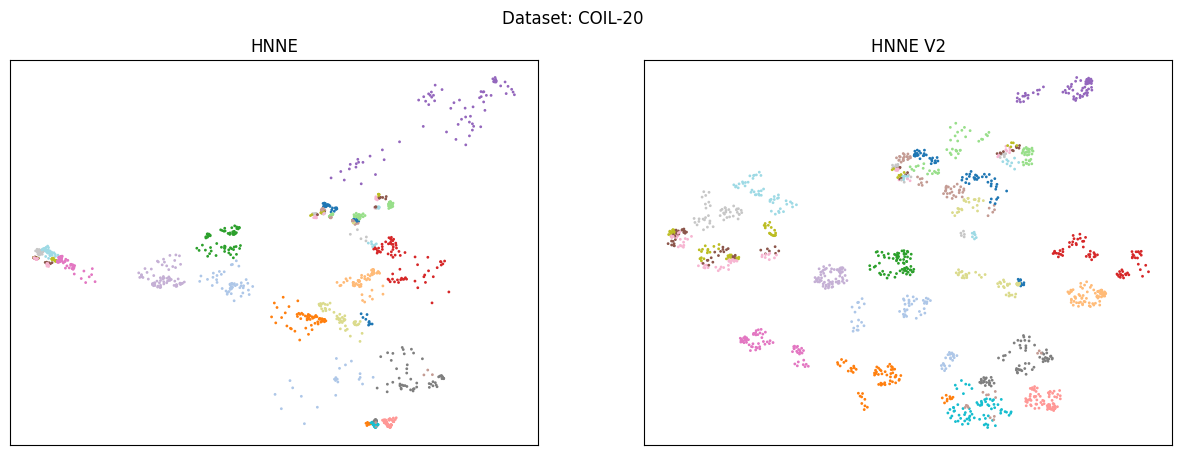

In [38]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=labels, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=labels, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

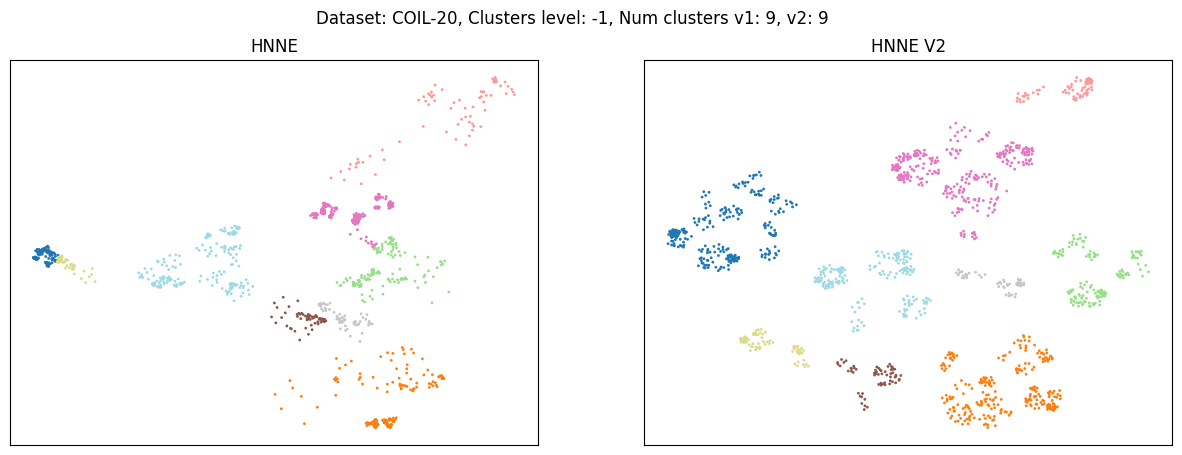

In [39]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=clusters_v1, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=clusters_v2, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

### Shuttle

In [84]:
dataset_name = "Shuttle"
data, labels = load_shuttle(DATA_PATH)
print(data.shape, labels.shape)

(58000, 9) (58000,)


In [85]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 11 s, sys: 21.6 s, total: 32.6 s
Wall time: 2.83 s


In [86]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 13.5 s, sys: 14.8 s, total: 28.3 s
Wall time: 6.69 s


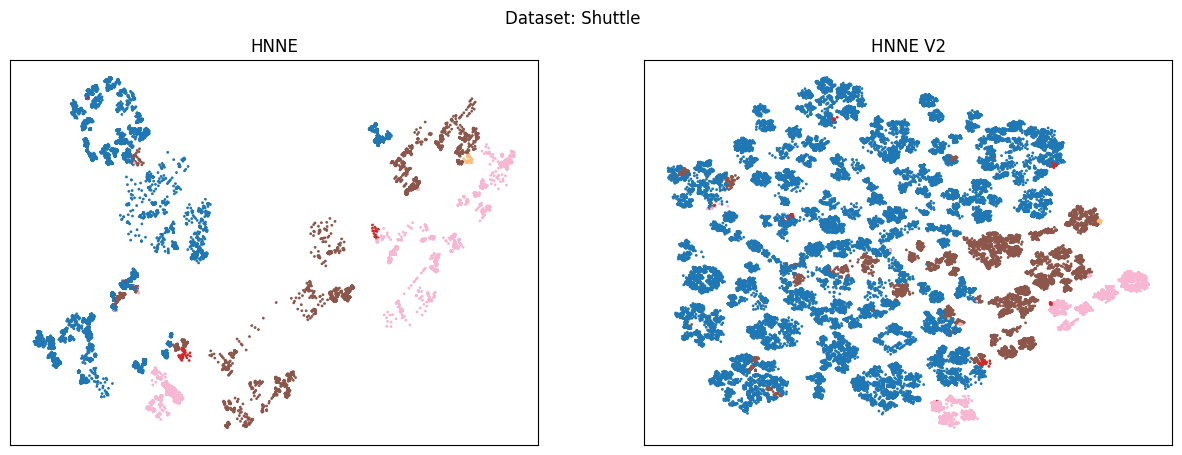

In [43]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=labels, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=labels, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

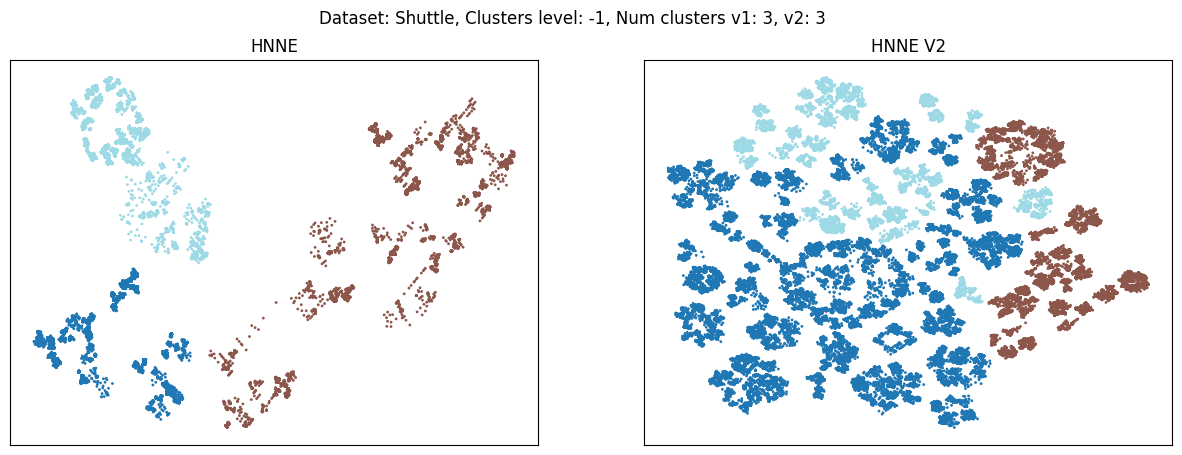

In [44]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=clusters_v1, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=clusters_v2, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

### MNIST

In [87]:
dataset_name = "MNIST"
data, labels = load_mnist(DATA_PATH)
print(data.shape, labels.shape)

(70000, 784) (70000,)


In [88]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 28.4 s, sys: 18.6 s, total: 47.1 s
Wall time: 3.32 s


In [89]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 30.6 s, sys: 14.1 s, total: 44.7 s
Wall time: 4.92 s


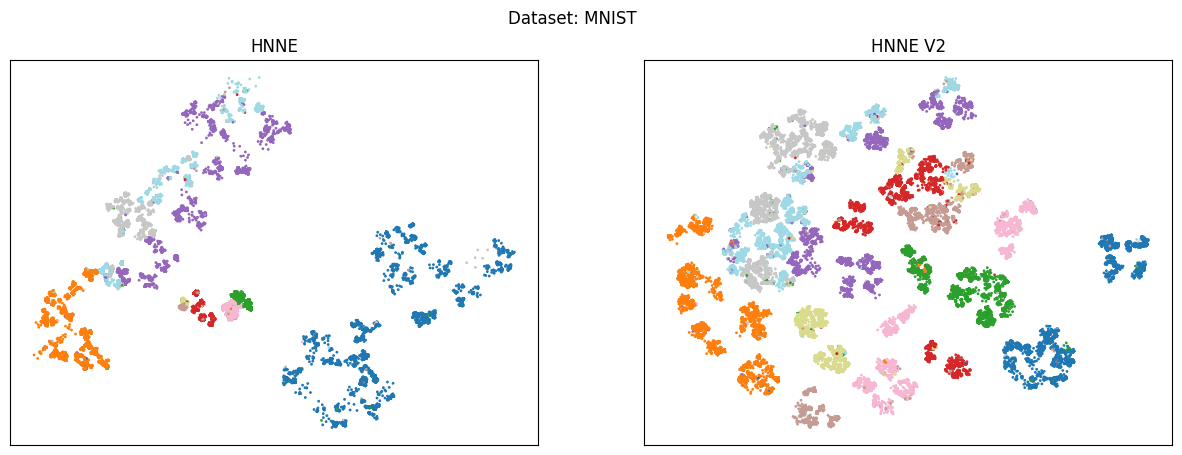

In [48]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=labels, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=labels, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

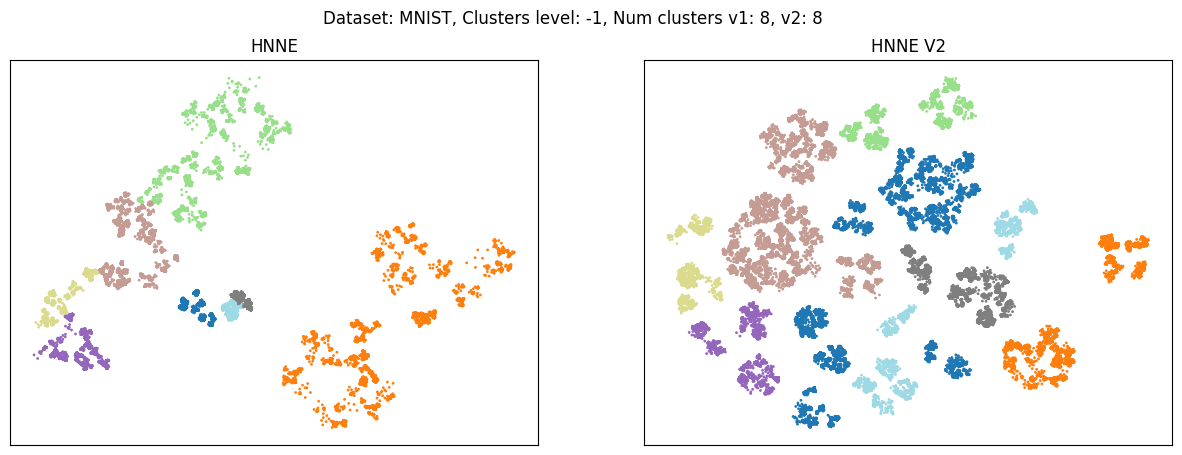

In [49]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=clusters_v1, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=clusters_v2, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

### FMNIST

In [90]:
dataset_name = "FMNIST"
data, labels = load_fmnist(DATA_PATH)
print(data.shape, labels.shape)

(70000, 784) (70000,)


In [91]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 28.5 s, sys: 16.4 s, total: 44.9 s
Wall time: 2.94 s


In [92]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 30 s, sys: 12.8 s, total: 42.8 s
Wall time: 3.76 s


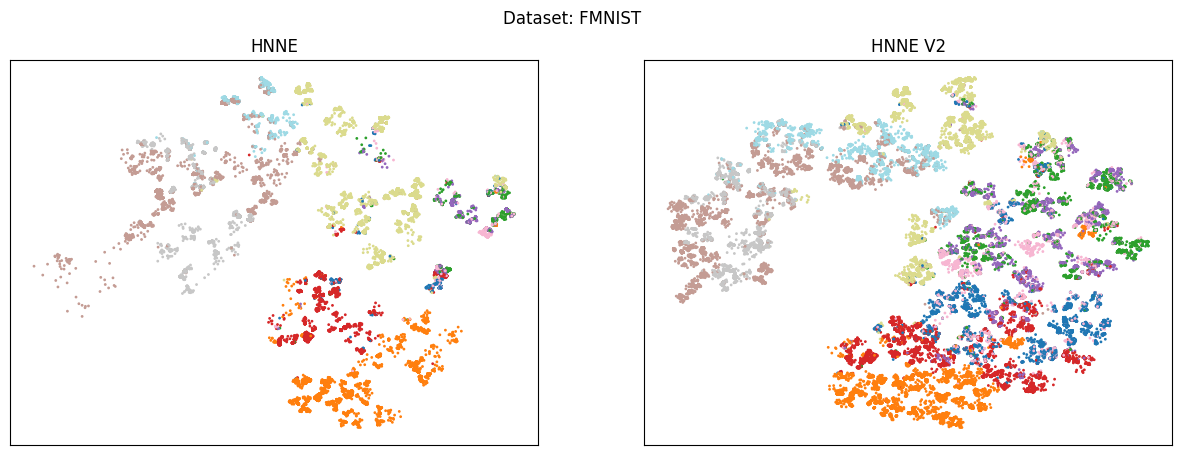

In [53]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=labels, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=labels, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

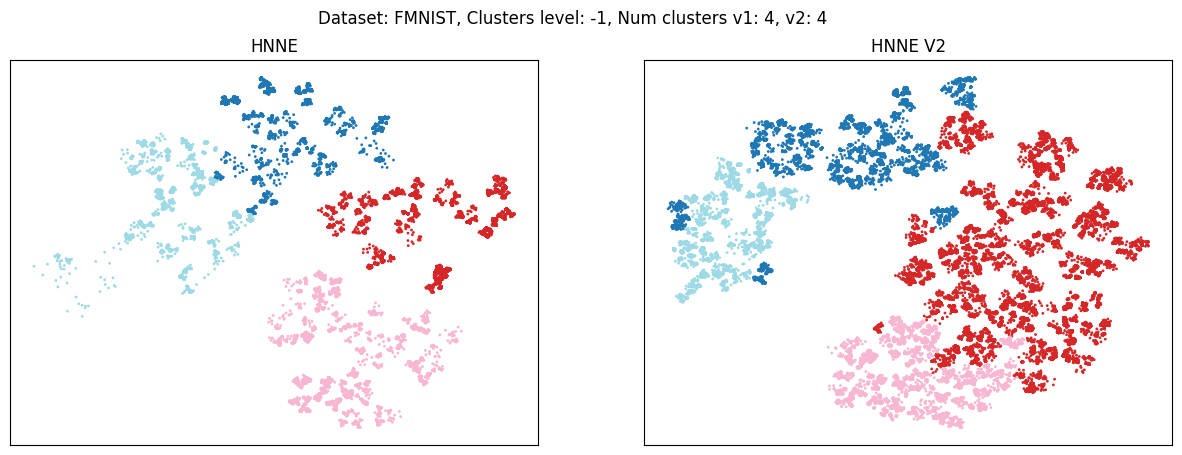

In [54]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=clusters_v1, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=clusters_v2, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

### ImageNet Test

In [93]:
dataset_name = "ImageNet Test"
data, labels = load_imagenet_test(DATA_PATH)
print(data.shape, labels.shape)

(50000, 2048) (50000,)


In [94]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 45.7 s, sys: 17.9 s, total: 1min 3s
Wall time: 4.87 s


In [95]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 48.7 s, sys: 15.5 s, total: 1min 4s
Wall time: 5.9 s


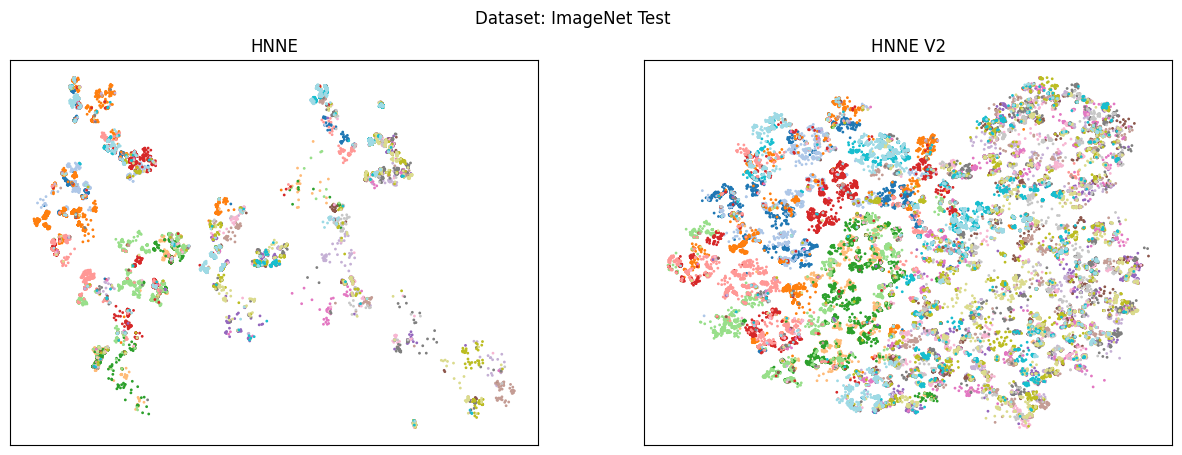

In [58]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=labels, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=labels, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

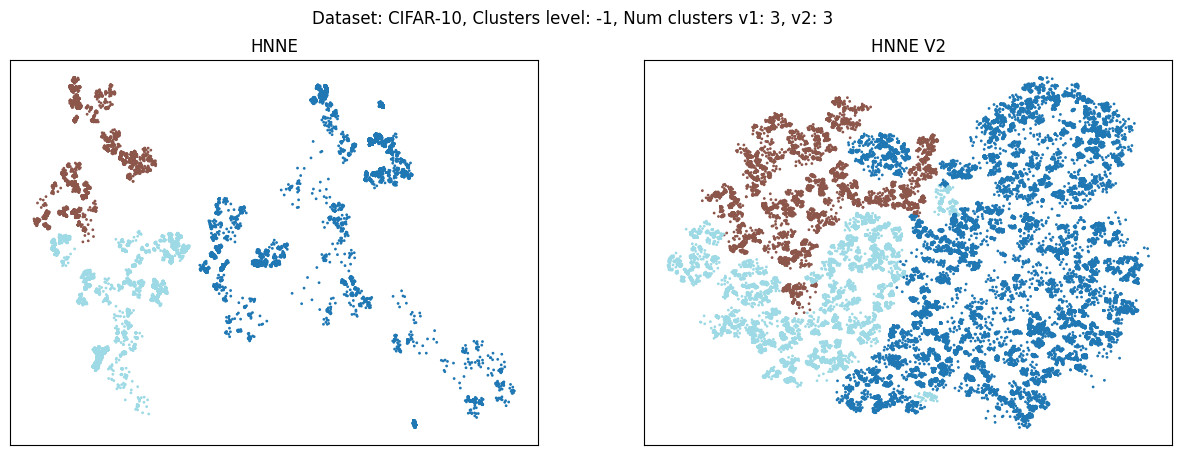

In [62]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=clusters_v1, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=clusters_v2, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

### CIFAR-10

In [96]:
dataset_name = "CIFAR-10"
data, labels = load_cifar_10(DATA_PATH)
print(data.shape, labels.shape)

Files already downloaded and verified
Files already downloaded and verified
(60000, 3072) (60000,)


In [97]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 2min 15s, sys: 27.2 s, total: 2min 42s
Wall time: 9.12 s


In [98]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 2min 12s, sys: 23.8 s, total: 2min 36s
Wall time: 9.89 s


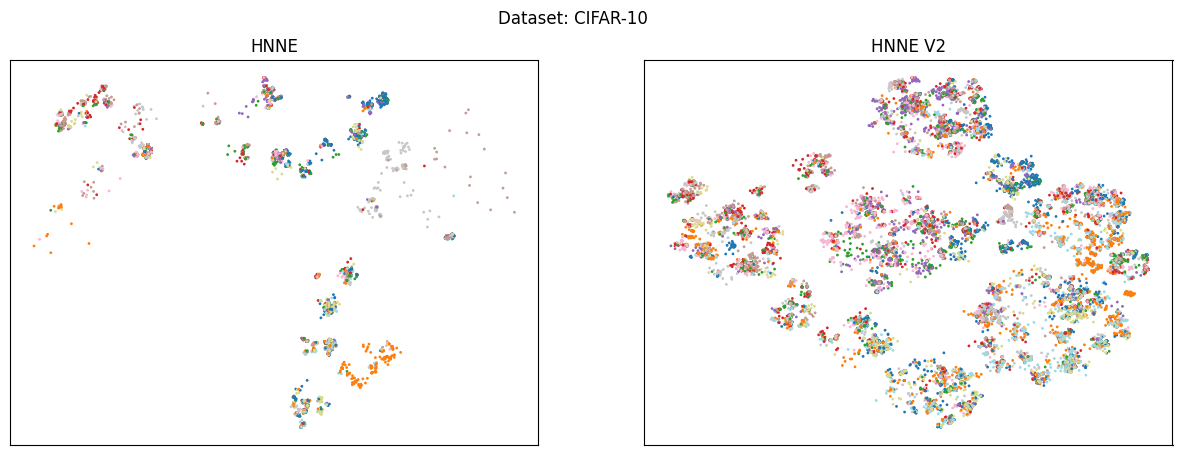

In [66]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=labels, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=labels, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

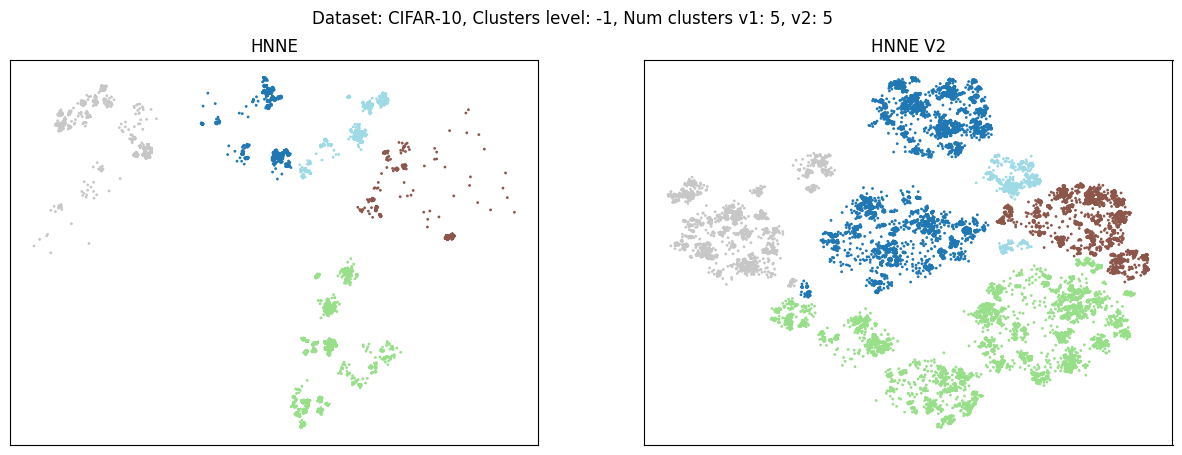

In [67]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=clusters_v1, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=clusters_v2, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

### Buffy

In [99]:
dataset_name = "Buffy"
data, labels = load_buffy(DATA_PATH)
print(data.shape, labels.shape)

(206254, 2048) (206254,)


In [100]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 6min 39s, sys: 1min 31s, total: 8min 11s
Wall time: 29.7 s


In [101]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 6min 50s, sys: 1min 24s, total: 8min 14s
Wall time: 31.7 s


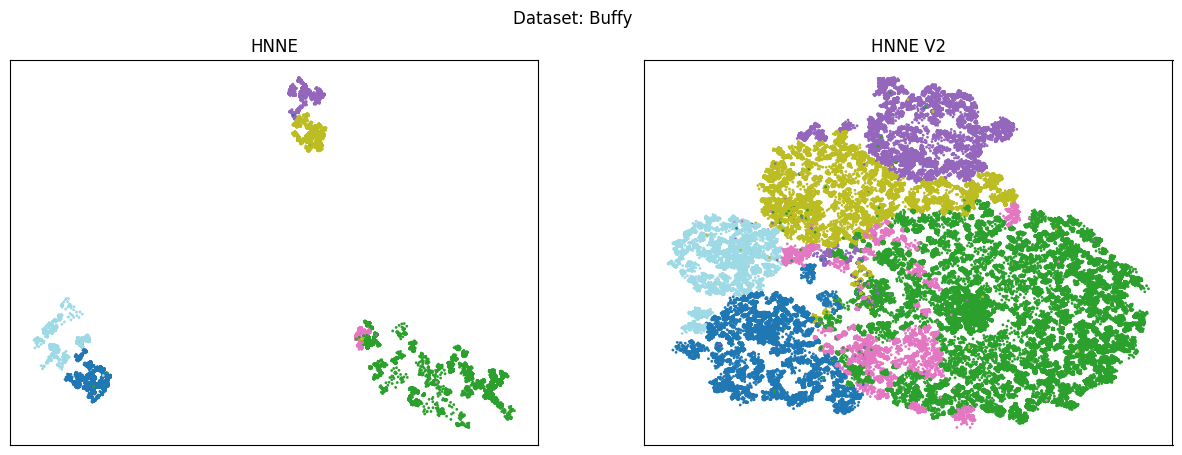

In [71]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=labels, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=labels, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

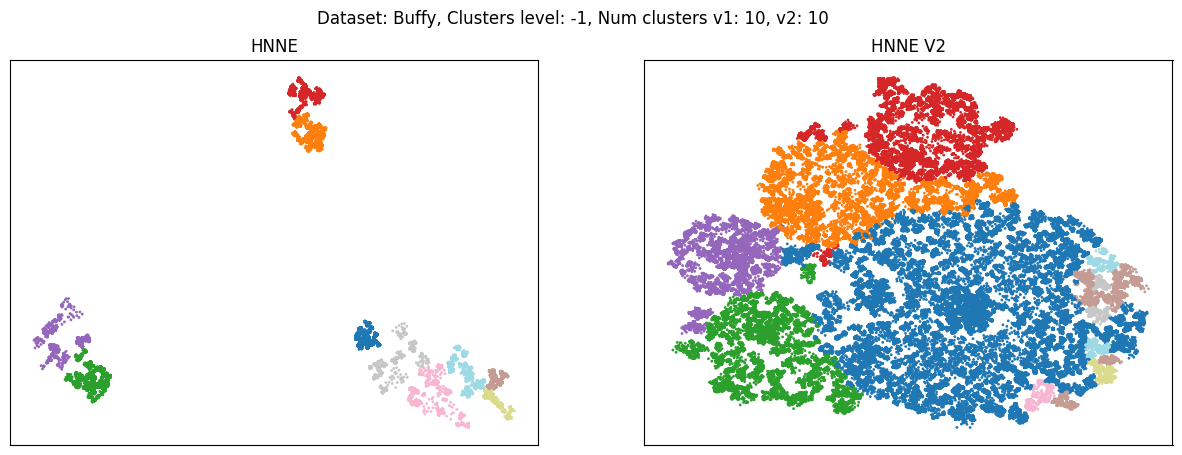

In [72]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj.T, s=1, c=clusters_v1, cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2.T, s=1, c=clusters_v2, cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

### ImageNet Train

In [4]:
dataset_name = "ImageNet Train"
data, labels = load_imagenet_train(DATA_PATH)
print(data.shape, labels.shape)

(1281167, 2048) (1281167,)


In [5]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 1h 3min 22s, sys: 18min 25s, total: 1h 21min 47s
Wall time: 6min 21s


In [6]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 41min 48s, sys: 24min 48s, total: 1h 6min 36s
Wall time: 7min 32s


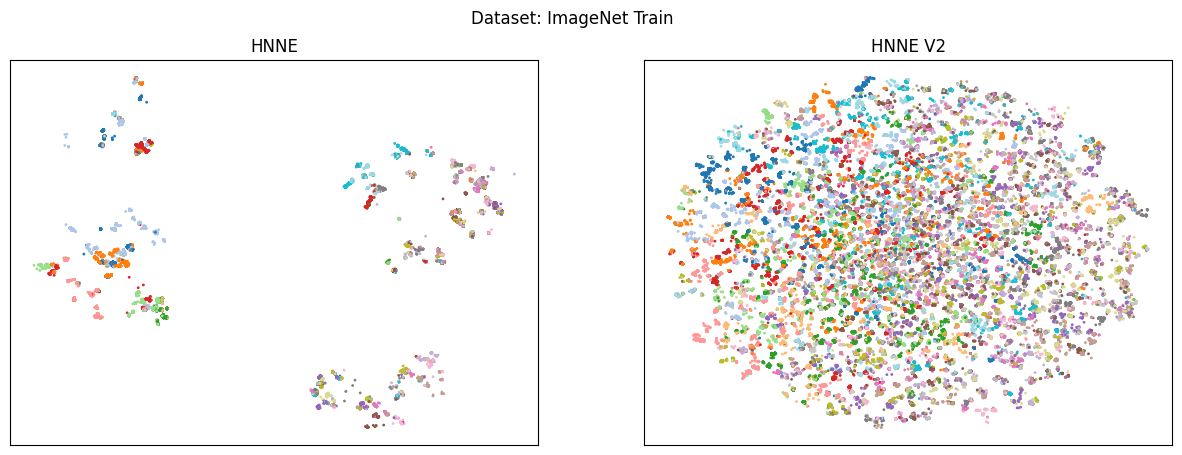

In [7]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

N = 100_000
idx = np.random.choice(data.shape[0], size=N, replace=False)

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj[idx].T, s=1, c=labels[idx], cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2[idx].T, s=1, c=labels[idx], cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

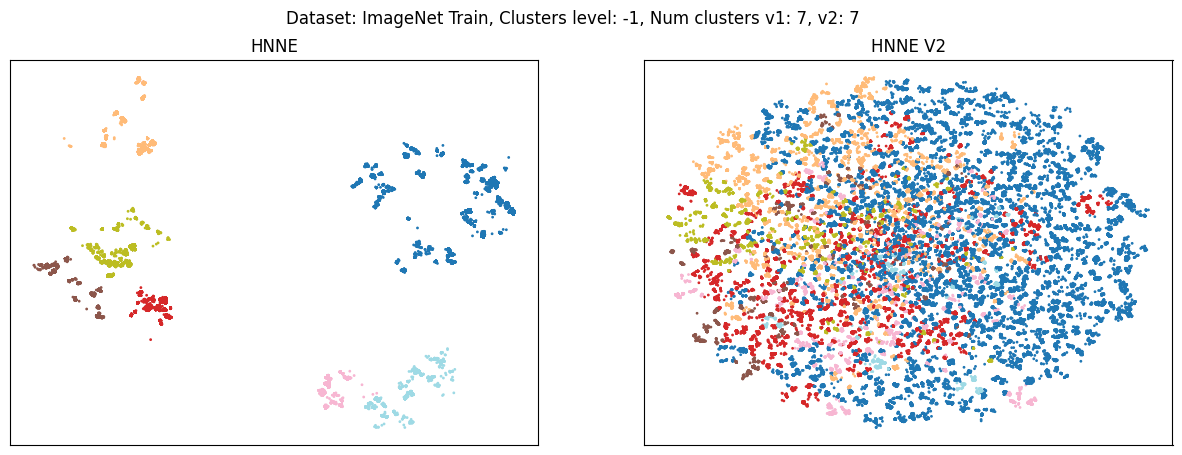

In [8]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")

N = 100_000
idx = np.random.choice(data.shape[0], size=N, replace=False)

ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj[idx].T, s=1, c=clusters_v1[idx], cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2[idx].T, s=1, c=clusters_v2[idx], cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

### Higgs

In [6]:
dataset_name = "Higgs"
data, labels = load_higgs(DATA_PATH)
print(data.shape, labels.shape)

(11000000, 28) (11000000,)


In [7]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 49min 49s, sys: 28min 20s, total: 1h 18min 9s
Wall time: 7min 37s


In [8]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 1h 15min 11s, sys: 25min 39s, total: 1h 40min 50s
Wall time: 45min 13s


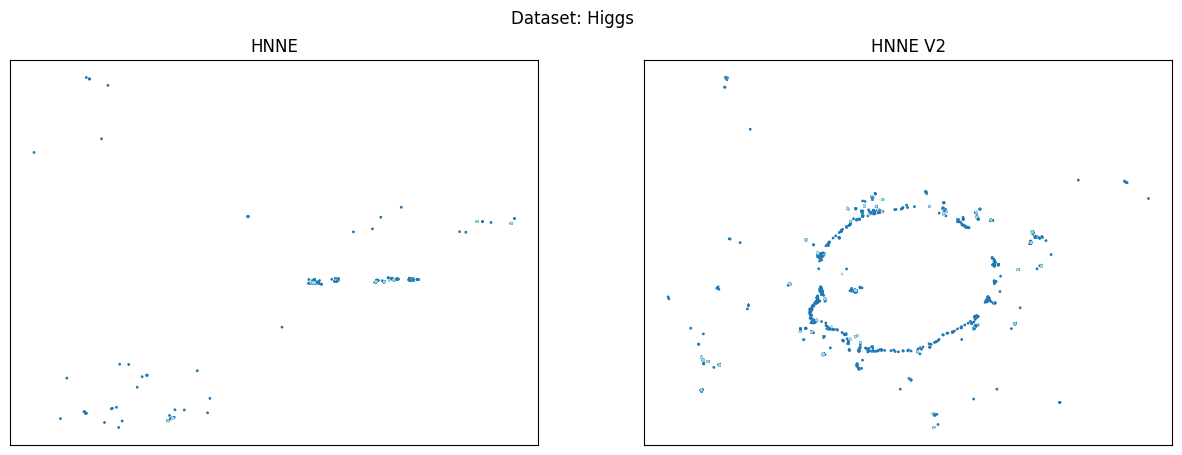

In [10]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

N = 100_000
idx = np.random.choice(data.shape[0], size=N, replace=False)

plt.suptitle(f"Dataset: {dataset_name}")
ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj[idx].T, s=1, c=labels[idx], cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2[idx].T, s=1, c=labels[idx], cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

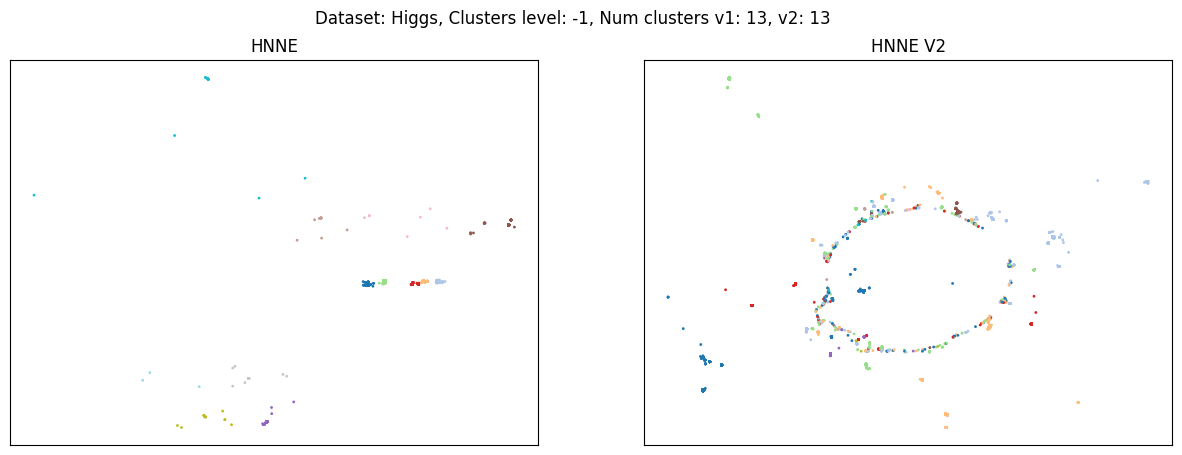

In [12]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")

N = 100_000
idx = np.random.choice(data.shape[0], size=N, replace=False)

ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj[idx].T, s=1, c=clusters_v1[idx], cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2[idx].T, s=1, c=clusters_v2[idx], cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()

### Google News

In [9]:
dataset_name = "Google News"
data, labels = load_google_news(DATA_PATH)
print(data.shape, labels.shape)

(3000000, 300) (3000000,)


In [10]:
%%time
hnne_v1 = HNNE(hnne_version="v1", random_state=42)
proj = hnne_v1.fit_transform(data, verbose=False)

CPU times: user 26min 43s, sys: 5min 56s, total: 32min 39s
Wall time: 1min 49s


In [11]:
%%time
hnne_v2 = HNNE(hnne_version="v2", random_state=42)
proj_v2 = hnne_v2.fit_transform(data, verbose=False)

CPU times: user 26min 42s, sys: 5min 8s, total: 31min 51s
Wall time: 2min 37s


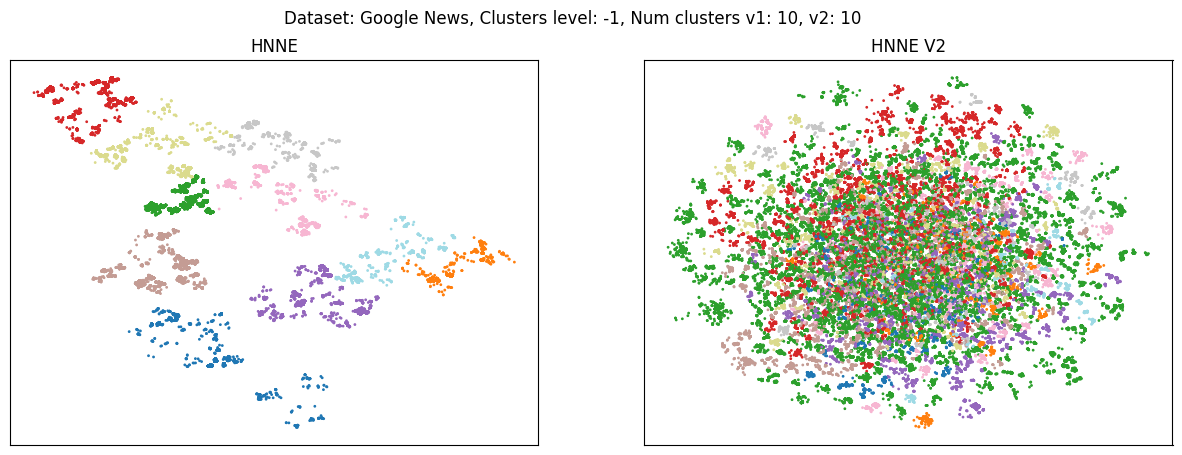

In [12]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

level = -1
clusters_v1 = hnne_v1.hierarchy_parameters.partitions[:, level]
clusters_v2 = hnne_v2.hierarchy_parameters.partitions[:, level]

plt.suptitle(f"Dataset: {dataset_name}, Clusters level: {level}, Num clusters v1: {hnne_v1.hierarchy_parameters.partition_sizes[level]}, v2: {hnne_v2.hierarchy_parameters.partition_sizes[level]}")

N = 100_000
idx = np.random.choice(data.shape[0], size=N, replace=False)

ax = axes[0]
ax.set_title("HNNE")
ax.scatter(*proj[idx].T, s=1, c=clusters_v1[idx], cmap=cmap)

ax = axes[1]
ax.set_title("HNNE V2")
ax.scatter(*proj_v2[idx].T, s=1, c=clusters_v2[idx], cmap=cmap)

for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

plt.show()